In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [2]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

















Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds

Your Kaggle username: rudraganeshr

Your Kaggle Key: ··········



100%|██████████| 2.70G/2.70G [00:16<00:00, 172MB/s]


In [3]:
train ='/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
validation_dir = '/content/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [4]:
import glob
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [5]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(validation_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes

70295 Train images

17572 Test images


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
img_width,img_height =128,128
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train,
                                target_size=(img_width,img_height),batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(validation_dir,shuffle=True,target_size=(img_width,img_height),batch_size=batch_size)

Found 70295 images belonging to 38 classes.

Found 17572 images belonging to 38 classes.


In [7]:
od.download('https://www.kaggle.com/datasets/keras/inceptionresnetv2')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds

Your Kaggle username: rudraganeshr

Your Kaggle Key: ··········



100%|██████████| 392M/392M [00:03<00:00, 109MB/s]


In [8]:
from keras import Model
from keras import optimizers
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D,Dense

model_dir = "../content/inceptionresnetv2/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5"
model = Sequential()
model.add( tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights= model_dir, input_shape=(128, 128, 3)))

model.add(GlobalAveragePooling2D())
model.add(Dense(38, activation="softmax"))
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 inception_resnet_v2 (Functi  (None, 2, 2, 1536)       54336736  

 onal)                                                           

                                                                 

 global_average_pooling2d (G  (None, 1536)             0         

 lobalAveragePooling2D)                                          

                                                                 

 dense (Dense)               (None, 38)                58406     

                                                                 


Total params: 54,395,142

Trainable params: 54,334,598

Non-trainable params: 60,544

_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
history = model.fit(train_generator,validation_data=test_generator,epochs=10,shuffle=True)

Epoch 1/10

2197/2197 [==============================] - 753s 292ms/step - loss: 0.2791 - accuracy: 0.9127 - val_loss: 0.7230 - val_accuracy: 0.8150

Epoch 2/10

2197/2197 [==============================] - 596s 271ms/step - loss: 0.1223 - accuracy: 0.9620 - val_loss: 0.1647 - val_accuracy: 0.9504

Epoch 3/10

2197/2197 [==============================] - 596s 271ms/step - loss: 0.0906 - accuracy: 0.9706 - val_loss: 0.5804 - val_accuracy: 0.8751

Epoch 4/10

2197/2197 [==============================] - 584s 266ms/step - loss: 0.0721 - accuracy: 0.9762 - val_loss: 0.0833 - val_accuracy: 0.9769

Epoch 5/10

2197/2197 [==============================] - 580s 264ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.3746 - val_accuracy: 0.9151

Epoch 6/10

2197/2197 [==============================] - 619s 282ms/step - loss: 0.0491 - accuracy: 0.9842 - val_loss: 0.1257 - val_accuracy: 0.9637

Epoch 7/10

2197/2197 [==============================] - 628s 286ms/step - loss: 0.0487 - accuracy: 

#Confusion Matrix

550/550 [==============================] - 46s 79ms/step


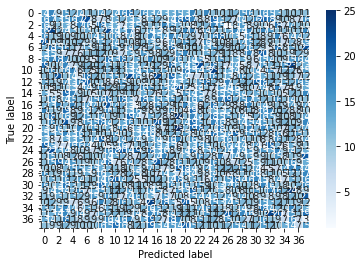

In [11]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report

In [12]:
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())
print(report)

550/550 [==============================] - 43s 78ms/step

                                                    precision    recall  f1-score   support



                                Apple___Apple_scab       0.03      0.03      0.03       504

                                 Apple___Black_rot       0.03      0.03      0.03       497

                          Apple___Cedar_apple_rust       0.02      0.02      0.02       440

                                   Apple___healthy       0.03      0.03      0.03       502

                               Blueberry___healthy       0.03      0.03      0.03       454

          Cherry_(including_sour)___Powdery_mildew       0.02      0.02      0.02       421

                 Cherry_(including_sour)___healthy       0.04      0.04      0.04       456

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.04      0.04      0.04       410

                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477

          

In [13]:
model.save('inceptionresnetv2_model.h5')

In [37]:
img='/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy/002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068_newPixel25.JPG'

In [38]:
def predict_disease(test_image):
  img = cv2.imread(test_image)
  img = img / 255.0
  img = cv2.resize(img, (128, 128))
  img = img.reshape(1,128, 128,3)
  prediction = model.predict(img)
  pred_class = np.argmax(prediction, axis = -1)
  return pred_class

In [39]:
pred=predict_disease(img)
d=pred[0]

1/1 [==============================] - 0s 51ms/step


In [40]:
Plant_disease = [  'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus',  'Tomato___healthy']


In [41]:
Plant_disease[d]

'Pepper,_bell___healthy'